# Exploratory Data Analysis : Haberman's Cancer Survival Dataset

In [45]:
# Don't know anything about the dataset when we start, we trying to understand what is the dataset is about.
# It is always a good idea to explore a dataset with multiple exploratory techniques, 

### Why EDA ?
In a hurry to get to the machine learning stage, some data scientists either entirely skip the exploratory process or do a very perfunctory job.This is a mistake with many implications, including generating inaccurate models, generating accurate models but on the wrong data, not creating the right types of variables in data preparation, and using resources inefficiently because of realizing only after generating models that perhaps the data is skewed, or has outliers, or has too many missing values, or finding that some values are inconsistent.

## EDA on Haberman’s Cancer Survival Dataset :
### 1. Understanding the dataset
Title : Haberman Survival Data
Description : The dataset contains cases from a study that was conducted between 1958 and 1970 at the university of Chicago's
Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at the time of operation (numerical)
2. Patient's age of operation (year--1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival Status (class Attribute):
5. 1 = The patient survived 5 years or longer
6. 2 = The patient died within 5 years

### 2. importing libraries and loading the file


In [21]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns

# reading the csv file into jupyter notebook
haberman = pd.read_csv('haberman.csv')

### 3.Understanding the data

In [22]:
# printing the first 5 rows from the csv file
haberman.tail()

,age,year,nodes,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [23]:
# print the number of rows and colums
haberman.shape # 306 rows and 4 columns

(306, 4)

### Observation :
306 rows and 4 columns

In [24]:
# print the columns names
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [25]:
# knowing the brief information about the dataset
print(haberman.info()) # using info() method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


### Observation :
1. There are no missing values in the dataset
2. All the columns are integer data type.
3. The data type of the status is an integer, it has to be converted to a categorical datatype
4. In the status column, the value 1 can be mapped to 'yes' which means the patient has survived 5 years or longer.
    and the value 2 can be mapped to 'no' which means the patient died within 5 years.

In [28]:
haberman['status'] = haberman['status'].map({1:'Yes', 2:'No'})
haberman.head()


,age,year,nodes,status
0,30,64,1,NaN
1,30,62,3,NaN
2,30,65,0,NaN
3,31,59,2,NaN
4,31,65,4,NaN


In [130]:
haberman.describe() # it counts default count,mean,std,min,max,percentiles for numerical veriables.

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


### Obsevations :
1. counts the total number of columns in the dataset
2. mean : mean of all the values present in the column wise
3. std : it caluclates Standard Deviation to all the columns
4. min : it calculates minimum values in the all variables
5. 25% : it gives the 25th percentile value
6. 50%: it gives the 50th percentile value
7. 75% : it gives the 75th percentile value
8. it gives mximum values of all the variables

In [131]:
haberman['status'].value_counts()
# it counts class wise or catogorical wise

Yes    225
No      81
Name: status, dtype: int64

### Observation : 
-> the value_counts() function tells how many data points for each class are present. Here it tells how many patients are 
    survived and did not survived.

-> out of 306 patients, 225 patients survived and 81 did not survived.

-> data set is IMBALANCED

In [132]:
status_yes = haberman[haberman['status']=='Yes']
status_yes.describe()
#status_yes dataframe stores all the records where status is yes

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [133]:
status_no = haberman[haberman['status']=='No']
status_no.describe()
#status_yes dataframe stores all the records where status is yes

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


### Observations:
1. The mean age and the year in which the patients got operated are almost similar of both the classes, while the mean of the nodes of both the classes differs by 5 units approximately.
2. The nodes of patients who survived are less when compared to patients who did not survive.

## 4. Univariate Analysis
1. univariate analysis is to describe, summarize and find patterns in the single feature

### The Probability Density Function(PDF): 
1. Probability Density Function(PDF) is the probability that the variable takes a value x (a smoothed version of the Histogram)
2. Here Hight of the bar denotes the percentage of data points under the corresponding group

C:\Users\bhanuchandra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\bhanuchandra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\bhanuchandra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


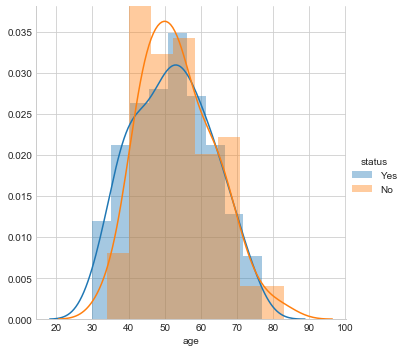

In [134]:
sns.FacetGrid(haberman, hue='status', size =5) \
    .map(sns.distplot, 'age') \
    .add_legend();
plt.show();

## Observation :
1. Major overlapping is observed, which tells us that survival chances are irrespective of person's age.
2. Although there is overlapping we can visually tell that people whose age is in the range 30-40 are more likely survive,
    and 40-60 are less likely to survive. While people whose age is in the range 60-75 have equal chances of surviving and
    not surviving.
3. yet, this can't be our final conclusion. we can't decide the servival chances of a patient just by considering the age parameter.


C:\Users\bhanuchandra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\bhanuchandra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\bhanuchandra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


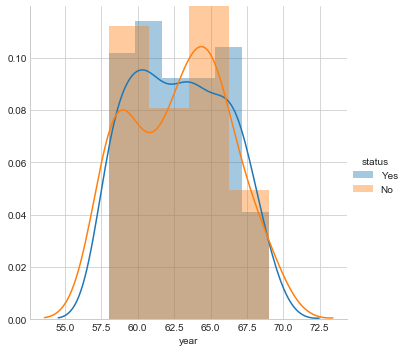

In [140]:
sns.FacetGrid(haberman, hue='status', size = 5) \
    .map(sns.distplot,'year') \
    .add_legend();
plt.show();

## Observations :
1. There is major overlapping observed. This graph only tells how many of the operations were successful and how many weren't.
   this can't be a parameter to decide the patient's survival chances.
2. How ever it can be observed that in the years 1960 and 1965 there was more unsuccessful operations were done.

C:\Users\bhanuchandra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\bhanuchandra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\bhanuchandra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


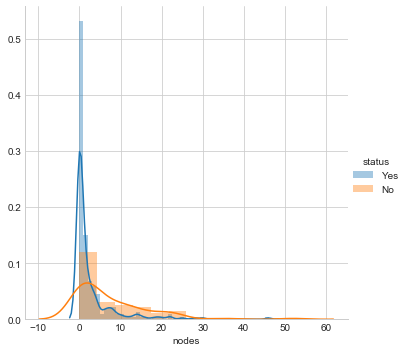

In [141]:
sns.FacetGrid(haberman, hue='status', size = 5) \
    .map(sns.distplot, 'nodes') \
    .add_legend();
plt.show()

## Observation :
1. patients with no nodes or 1 node are more likely to survive. There are very few chances of surviving if there are 25 or more nodes

## Cumulative Distribution Function(CDF) :
The Cumulative Distribution Function (CDF) is the probability that the variable takes a value less than or equal to x.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
***********************************************************
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


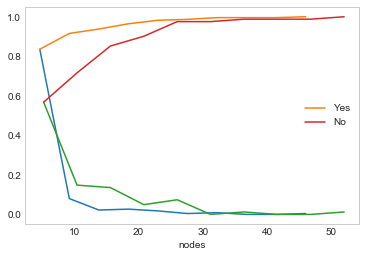

In [142]:
counts,bin_edges = np.histogram(status_yes['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf, label ='Yes')
plt.xlabel('nodes')
plt.grid()

print("***********************************************************")
counts1, bin_edges1 = np.histogram(status_no['nodes'], bins=10, density = True)
pdf1 = counts1/(sum(counts1))
print(pdf1);
print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'No')
plt.xlabel('nodes')
plt.legend()
plt.show()

## Observation :
1. 83.55% of the patients who have survived had nodes in the range of 0 - 4.6

## Box Plots 
The box extends from the lower to upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data. Outlier points are those past the end of the whiskers.

Violin plot is the combination of a box plot and cummulative density function(CDF).

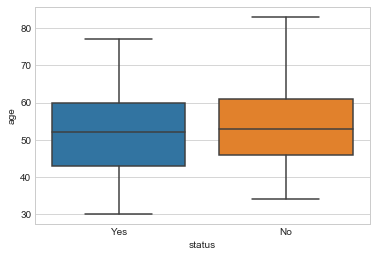

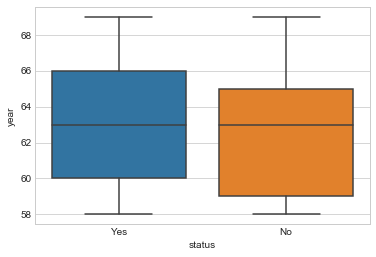

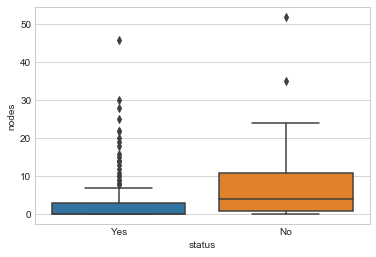

In [143]:
sns.boxplot(x='status',y='age',data=haberman)
plt.show()
sns.boxplot(x='status',y='year',data=haberman)
plt.show()
sns.boxplot(x='status',y='nodes',data=haberman)
plt.show()

Box plot takes a less space and visually represents the five number summary of the data points in a box. 
The outliers are displayed as points outside the box.
1. Q1–1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1

## Voilin plot :
Violin plot is the combination of a box plot and cummilative density function(CDF).


C:\Users\bhanuchandra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


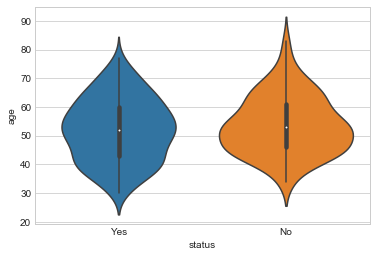

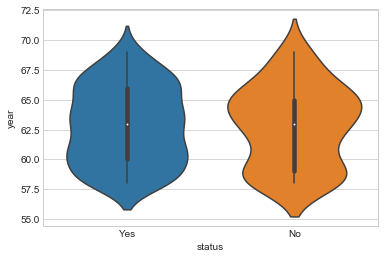

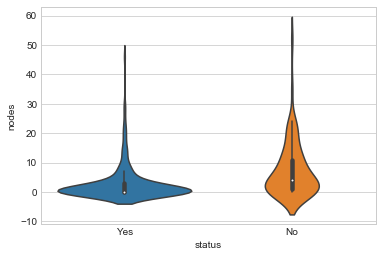

In [144]:
sns.violinplot(x='status',y='age',data = haberman,height = 10)
plt.show()
sns.violinplot(x='status',y='year',data = haberman,height = 10)
plt.show()
sns.violinplot(x='status',y='nodes',data = haberman,height = 10)
plt.show()

## Observations:
1. Patients with more than 1 nodes are not likely to survive. More the number of nodes, lesser the survival chances.
2. A large percentage of patients who survived had 0 nodes. Yet there is a small percentage of patients who had no positive axillary nodes died within 5 years of operation, thus an absence of positive axillary nodes cannot always guarantee survival.
3. There were comparatively more people who got operated in the year 1965 did not survive for more than 5 years.
4. There were comparatively more people in the age group 45 to 65 who did not survive. Patient age alone is not an important parameter in determining the survival of a patient.
5. The box plots and violin plots for age and year parameters give similar results with a substantial overlap of data points. The overlap in the box plot and the violin plot of nodes is less compared to other features but the overlap still exists and thus it is difficult to set a threshold to classify both classes of patients.

## Bi-Variate analysis :
### Scatter Plots

A scatter plot is a two-dimensional data visualization that uses dots to represent the values obtained for two different variables — one plotted along the x-axis and the other plotted along the y-axis.

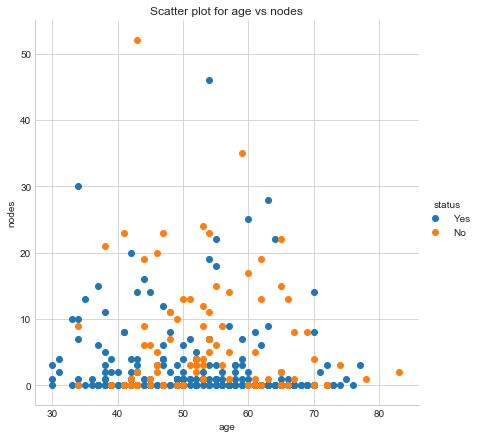

In [145]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue = 'status', size = 6) \
    .map(plt.scatter, 'age', 'nodes') \
    .add_legend();
plt.title('Scatter plot for age vs nodes')
plt.show();

## Observation :
1. patients with 0 nodes are more likely to survive irrespective of their age.
2. there are hardly any patients who have nodes more than 25.
3. Patients aged more than 50 with with nodes more than 10 are less likely to survive.

## Pair Plots :
By default, this function will create a grid of Axes such that each variable in data will be shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

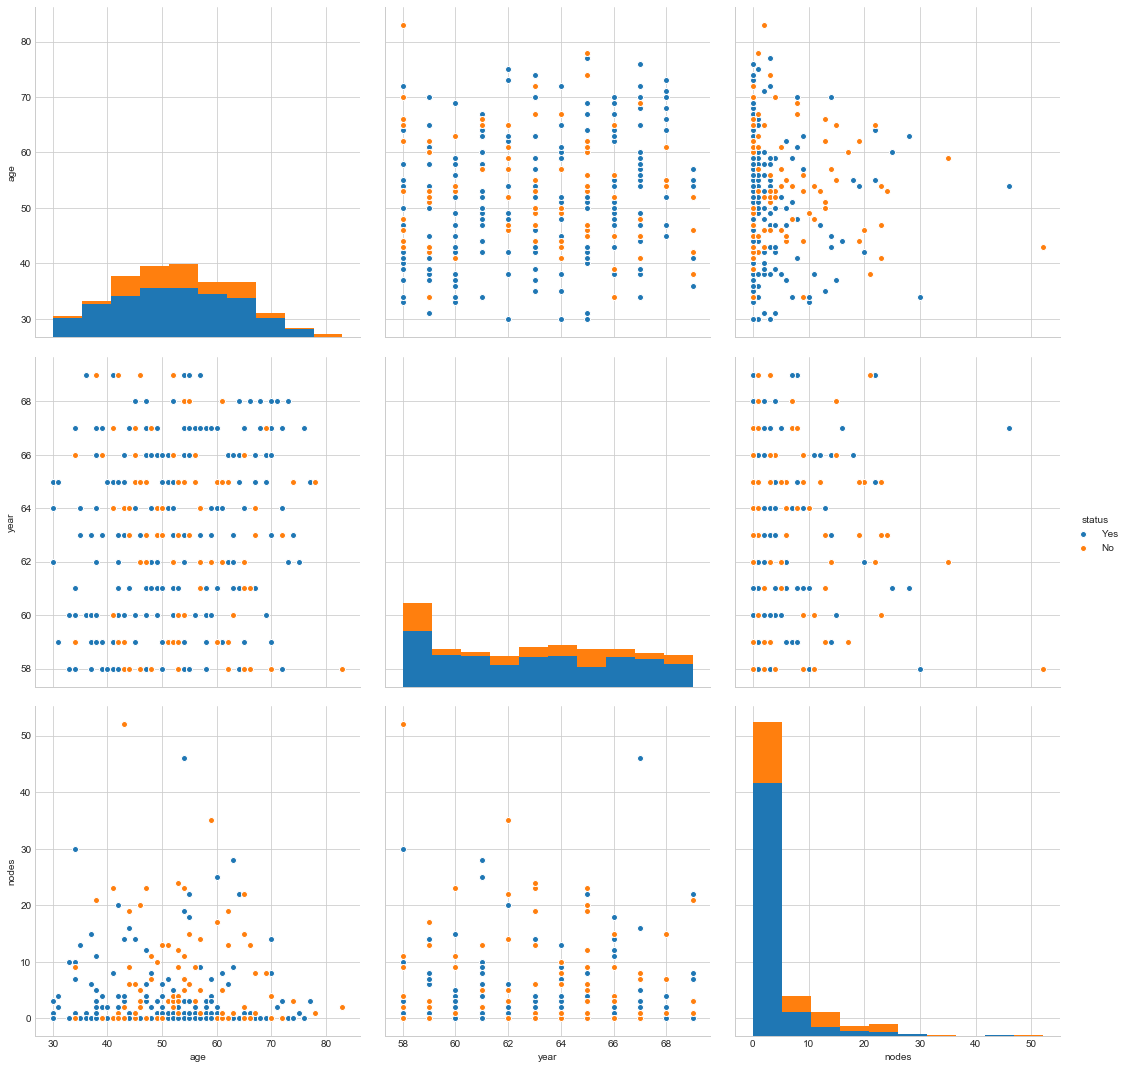

In [146]:
sns.set_style('whitegrid')
sns.pairplot(haberman, hue='status', size = 5)
plt.show()

## Observations:
The plot between year and nodes is comparatively better.

## Multivariate analysis :
### Contour Plot
A contour line or isoline of a function of two variables is a curve along which the function has a constant value. It is a cross-section of the three-dimensional graph.

C:\Users\bhanuchandra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


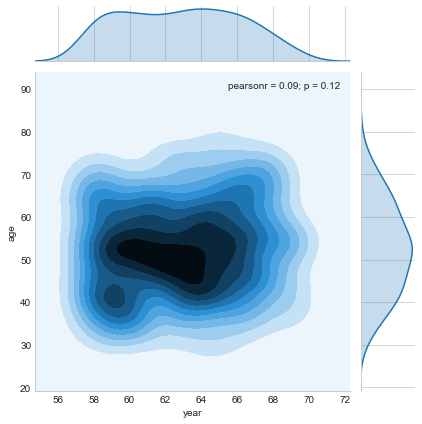

In [147]:
sns.jointplot(x = 'year', y = 'age', data = haberman, kind = 'kde')
plt.show()

## Observation:
From 1960 to 1964, more operations done on the patients in the age group 45 to 55.

## Conclusions:
1. Patient’s age and operation year alone are not deciding factors for his/her survival. Yet, people less than 35 years have more chance of survival.
2. Survival chance is inversely proportional to the number of positive axillary nodes. We also saw that the absence of positive axillary nodes cannot always guarantee survival.
3. The objective of classifying the survival status of a new patient based on the given features is a difficult task as the data is imbalanced.